In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import utilssphering
import utils
import os
import random
import numpy as np
import itertools
import pycytominer
import matplotlib.pyplot as plt

random.seed(9000)

In [60]:
import matplotlib 
# Get versions of stuff, if you want
print(
    pd.__version__,
    np.version.version,
    matplotlib.__version__
)

1.4.2 1.22.4 3.5.2


In [62]:
# Set some variables + read the metadata

n_samples = 1000
n_replicates = 4  #number of sample replicates within each plate 
metadata_common = 'Metadata_moa'
metadata_perturbation = 'Metadata_broad_sample'
group_by_feature = 'Metadata_broad_sample'

experiment_df = (
    pd.read_csv('output/experiment-metadata-updated.csv')
)

experiment_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,spinning-disc,Binning,Magnification,aperture,dry-immersion,vs-brightfield,simultaneous-excitation,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,no,1,10,0.45,NaN,NaN,NaN,6,4,1,NaN,none
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,yes,1,10,0.45,NaN,NaN,NaN,6,4,1,NaN,none
2,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,yes,1,10,0.45,NaN,NaN,NaN,6,4,3,NaN,none
3,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,yes,1,20,0.75,NaN,NaN,NaN,6,4,3,NaN,none
4,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Confocal,no,1,20,0.75,NaN,NaN,NaN,6,9,1,NaN,none
5,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_9site_20XPA_Crest,Confocal,yes,1,20,0.75,NaN,NaN,NaN,6,9,1,NaN,none
6,MolDev,Scope1_MolDev_20X_Adaptive,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_Adaptive_20XPA,Confocal,yes,1,20,0.75,NaN,NaN,NaN,6,3,1,NaN,none
7,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,NaN,1,10,0.45,NaN,NaN,NaN,4,1,1,NaN,none
8,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,NaN,1,10,0.45,NaN,NaN,NaN,4,1,1,NaN,none
9,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117062a10x,Widefield,NaN,1,10,0.45,NaN,NaN,NaN,4,1,1,NaN,none


In [30]:
# List columns, if you'd like

dire = "../jump-scope/profiles/1siteSubSample_Scope1_MolDev_10X/Plate2_PCO_6ch_4site_10XPA"

for i in os.listdir(dire):
    if i.endswith(".csv.gz"):
        print(i)
        t = pd.read_csv(os.path.join("../jump-scope/profiles/1siteSubSample_Scope1_MolDev_10X/Plate2_PCO_6ch_4site_10XPA", i))
        # pd.read_csv("../jump-scope/profiles/1siteSubSample_Scope1_MolDev_10X/Plate2_PCO_6ch_4site_10XPA/Plate2_PCO_6ch_4site_10XPA_normalized_negcon.csv.gz")
        print([i for i in t.columns if "Metadata" in i])

# test = pd.read_csv("../jump-scope/profiles/1siteSubSample_Scope1_MolDev_10X/Plate2_PCO_6ch_4site_10XPA/Plate2_PCO_6ch_4site_10XPA.csv.gz")

# [i for i in plate_df.columns if "metadata_" in i.casefold()]

# test

Plate2_PCO_6ch_4site_10XPA_normalized_negcon.csv.gz
['Metadata_broad_sample', 'Metadata_solvent', 'Metadata_Plate', 'Metadata_Well', 'Metadata_Site_Count', 'Metadata_Count_Cells', 'Metadata_Count_CellsSmall', 'Metadata_Count_Cytoplasm', 'Metadata_Count_CytoplasmSmall', 'Metadata_Count_Nuclei', 'Metadata_Count_NucleiSmall', 'Metadata_Object_Count', 'Metadata_InChIKey', 'Metadata_pert_iname', 'Metadata_pubchem_cid', 'Metadata_moa', 'Metadata_pert_type', 'Metadata_control_type', 'Metadata_smiles']
Plate2_PCO_6ch_4site_10XPA.csv.gz
['Metadata_Plate', 'Metadata_Well', 'Metadata_Site_Count', 'Metadata_Count_Cells', 'Metadata_Count_CellsSmall', 'Metadata_Count_Cytoplasm', 'Metadata_Count_CytoplasmSmall', 'Metadata_Count_Nuclei', 'Metadata_Count_NucleiSmall', 'Metadata_Object_Count']
Plate2_PCO_6ch_4site_10XPA_normalized.csv.gz
['Metadata_broad_sample', 'Metadata_solvent', 'Metadata_Plate', 'Metadata_Well', 'Metadata_Site_Count', 'Metadata_Count_Cells', 'Metadata_Count_CellsSmall', 'Metadata_C

In [66]:
def create_moa_dataframe(experiment_metadata, profile_parent_dir, batch_col="Batch", match_or_rep_or_both="replicating", enable_sphering="both"):
    """
    batch_col is the name of the column to distinguish the profile parent folder. Eg. "Scope1_MolDev_10X" or "1siteSubSample_Scope1_MolDev_10X"
    Output df will also use this batch_col name
    """
    n_samples = 1000
    n_replicates = 4  #number of sample replicates within each plate 
    metadata_common = 'Metadata_moa'
    metadata_perturbation = 'Metadata_broad_sample'
    group_by_feature = 'Metadata_broad_sample'

    corr_replicating_list = list()
    corr_matching_list = list()

    for ind, a_vendor in enumerate(experiment_metadata["Vendor"].unique()):
        vendor_data = experiment_metadata.loc[experiment_metadata["Vendor"] == a_vendor]
        for a_batch in vendor_data[batch_col].unique():
            batch_data = vendor_data.loc[vendor_data[batch_col] == a_batch]
            for a_plate in batch_data["Assay_Plate_Barcode"].unique():
                # plate_data = batch_data.loc[batch_data["Assay_Plate_Barcode"] == a_plate]
                data_path = os.path.join(profile_parent_dir, a_batch, a_plate, a_plate+"_normalized_feature_select_negcon_batch.csv.gz")
                load_data = pd.read_csv(data_path)
                if match_or_rep_or_both.casefold() == "replicating" or match_or_rep_or_both.casefold() == "both":
                    if enable_sphering.casefold() == "yes" or enable_sphering.casefold() == "both":
                        sphere_bool = True
                        replicate_corr_sphere, null_replicating_sphere, prop_95_replicating_sphere, value_95_replicating_sphere = utilssphering.calculate_percent_replicating_MOA("", "", data_df=load_data)
                        corr_replicating_list.append(pd.DataFrame({'Vendor': a_vendor,
                                                                    batch_col: a_batch,
                                                                    'Assay_Plate_Barcode': a_plate,
                                                                    'Replicating':[replicate_corr_sphere],
                                                                    'Null_Replicating':[null_replicating_sphere],
                                                                    'Percent_Replicating':prop_95_replicating_sphere,
                                                                    'Value_95':value_95_replicating_sphere,
                                                                    'sphering': sphere_bool}, index=[ind]))

                    if enable_sphering.casefold() == "no" or enable_sphering.casefold() == "both": 
                        sphere_bool = False
                        plate_df = utils.remove_negcon_empty_wells(load_data)
                        replicate_corr = list(utils.corr_between_replicates(plate_df, group_by_feature))
                        null_replicating = list(utils.corr_between_non_replicates(plate_df, n_samples=n_samples, n_replicates=n_replicates, metadata_compound_name=group_by_feature))
                        prop_95_replicating, value_95_replicating = utils.percent_score(null_replicating, replicate_corr, how='right')
                        corr_replicating_list.append(pd.DataFrame({'Vendor': a_vendor,
                                                                    batch_col: a_batch,
                                                                    'Assay_Plate_Barcode': a_plate,
                                                                    'Replicating':[replicate_corr],
                                                                    'Null_Replicating':[null_replicating],
                                                                    'Percent_Replicating':prop_95_replicating,
                                                                    'Value_95':value_95_replicating,
                                                                    'sphering': sphere_bool}, index=[ind]))

                if match_or_rep_or_both.casefold() == "matching" or match_or_rep_or_both.casefold() == "both":
                    if enable_sphering.casefold() == "yes" or enable_sphering.casefold() == "both":
                        sphere_bool = True
                        matching_corr_sphere, null_matching_sphere, prop_95_matching_sphere, value_95_matching_sphere = utilssphering.calculate_percent_matching_MOA("", "", data_df=load_data)
                        corr_matching_list.append(pd.DataFrame({'Vendor': a_vendor,
                                                                batch_col: a_batch,
                                                                'Assay_Plate_Barcode': a_plate,
                                                                'Matching':[matching_corr_sphere],
                                                                'Null_Matching':[null_matching_sphere],
                                                                'Percent_Matching':prop_95_matching_sphere,
                                                                'Value_95':value_95_matching_sphere,
                                                                'sphering': sphere_bool}, index=[ind]))
                    
                    if enable_sphering.casefold() == "no" or enable_sphering.casefold() == "both": 
                        sphere_bool = False
                        plate_df = utils.remove_negcon_empty_wells(load_data)
                        matching_corr = list(utils.corr_between_perturbation_pairs(plate_df, 'Metadata_moa', 'Metadata_broad_sample'))
                        null_matching = list(utils.corr_between_perturbation_non_pairs(plate_df, n_samples=n_samples, metadata_common=metadata_common, metadata_perturbation=metadata_perturbation))
                        prop_95_matching, value_95_matching = utils.percent_score(null_matching, matching_corr, how='right')
                        corr_matching_list.append(pd.DataFrame({'Vendor': a_vendor,
                                                                batch_col: a_batch,
                                                                'Assay_Plate_Barcode': a_plate,
                                                                'Matching':[matching_corr],
                                                                'Null_Matching':[null_matching],
                                                                'Percent_Matching':prop_95_matching,
                                                                'Value_95':value_95_matching,
                                                                'sphering': sphere_bool}, index=[ind]))
    # Concatenate the data
    if match_or_rep_or_both.casefold() == "replicating" or match_or_rep_or_both.casefold() == "both":
        corr_replicating_df = pd.concat(corr_replicating_list, ignore_index=True)
    if match_or_rep_or_both.casefold() == "matching" or match_or_rep_or_both.casefold() == "both":
        corr_matching_df = pd.concat(corr_matching_list, ignore_index=True)
                
    # Merge metadata with output dataframes
    merge_columns = ['Vendor', batch_col, 'Assay_Plate_Barcode']
    if match_or_rep_or_both.casefold() == "both":
        corr_replicating_df = experiment_metadata.merge(corr_replicating_df, how="inner", on=merge_columns)
        corr_matching_df = experiment_metadata.merge(corr_matching_df, how="inner", on=merge_columns)
        return corr_replicating_df, corr_matching_df
    if match_or_rep_or_both.casefold() == "replicating":
        return experiment_metadata.merge(corr_replicating_df, how="inner", on=merge_columns)
    elif match_or_rep_or_both.casefold() == "matching":
        return experiment_metadata.merge(corr_matching_df, how="inner", on=merge_columns)

# df_replicating, df_matching = create_moa_dataframe(pd.read_csv('output/experiment-metadata.tsv', sep='\t'), "../jump-scope/profiles/", match_or_rep_or_both="both", enable_sphering="both")
# df = create_moa_dataframe(pd.read_csv('output/experiment-metadata.tsv', sep='\t'), "../jump-scope/profiles/", match_or_rep_or_both="replicating", enable_sphering="no")

# df


In [266]:
## Checkpoint save

if not os.path.isdir("checkpoints"):
    os.mkdir("checkpoints")

df_replicating.to_csv("checkpoints/moa-replicating-sphering.csv", index_label='index', index=False)

df_matching.to_csv("checkpoints/moa-matching-sphering.csv", index_label='index', index=False)

In [ ]:
# Load checkpoints

df_replicating = pd.read_csv("checkpoints/moa-replicating-sphering.csv", converters={'Null_Replicating':utilssphering.safe_literal_eval, "Replicating":utilssphering.safe_literal_eval}, na_values=np.nan)
df_matching = pd.read_csv("checkpoints/moa-matching-sphering.csv", converters={'Null_Matching':utilssphering.safe_literal_eval, "Matching":utilssphering.safe_literal_eval})

# print(len(df_matching.loc[0, ["Null_Matching"]][0]), len(df_replicating.loc[0, ["Null_Replicating"]][0]))
# print(len(df_matching1.loc[0, ["Null_Matching"]][0]), len(df_replicating1.loc[0, ["Null_Replicating"]][0]))


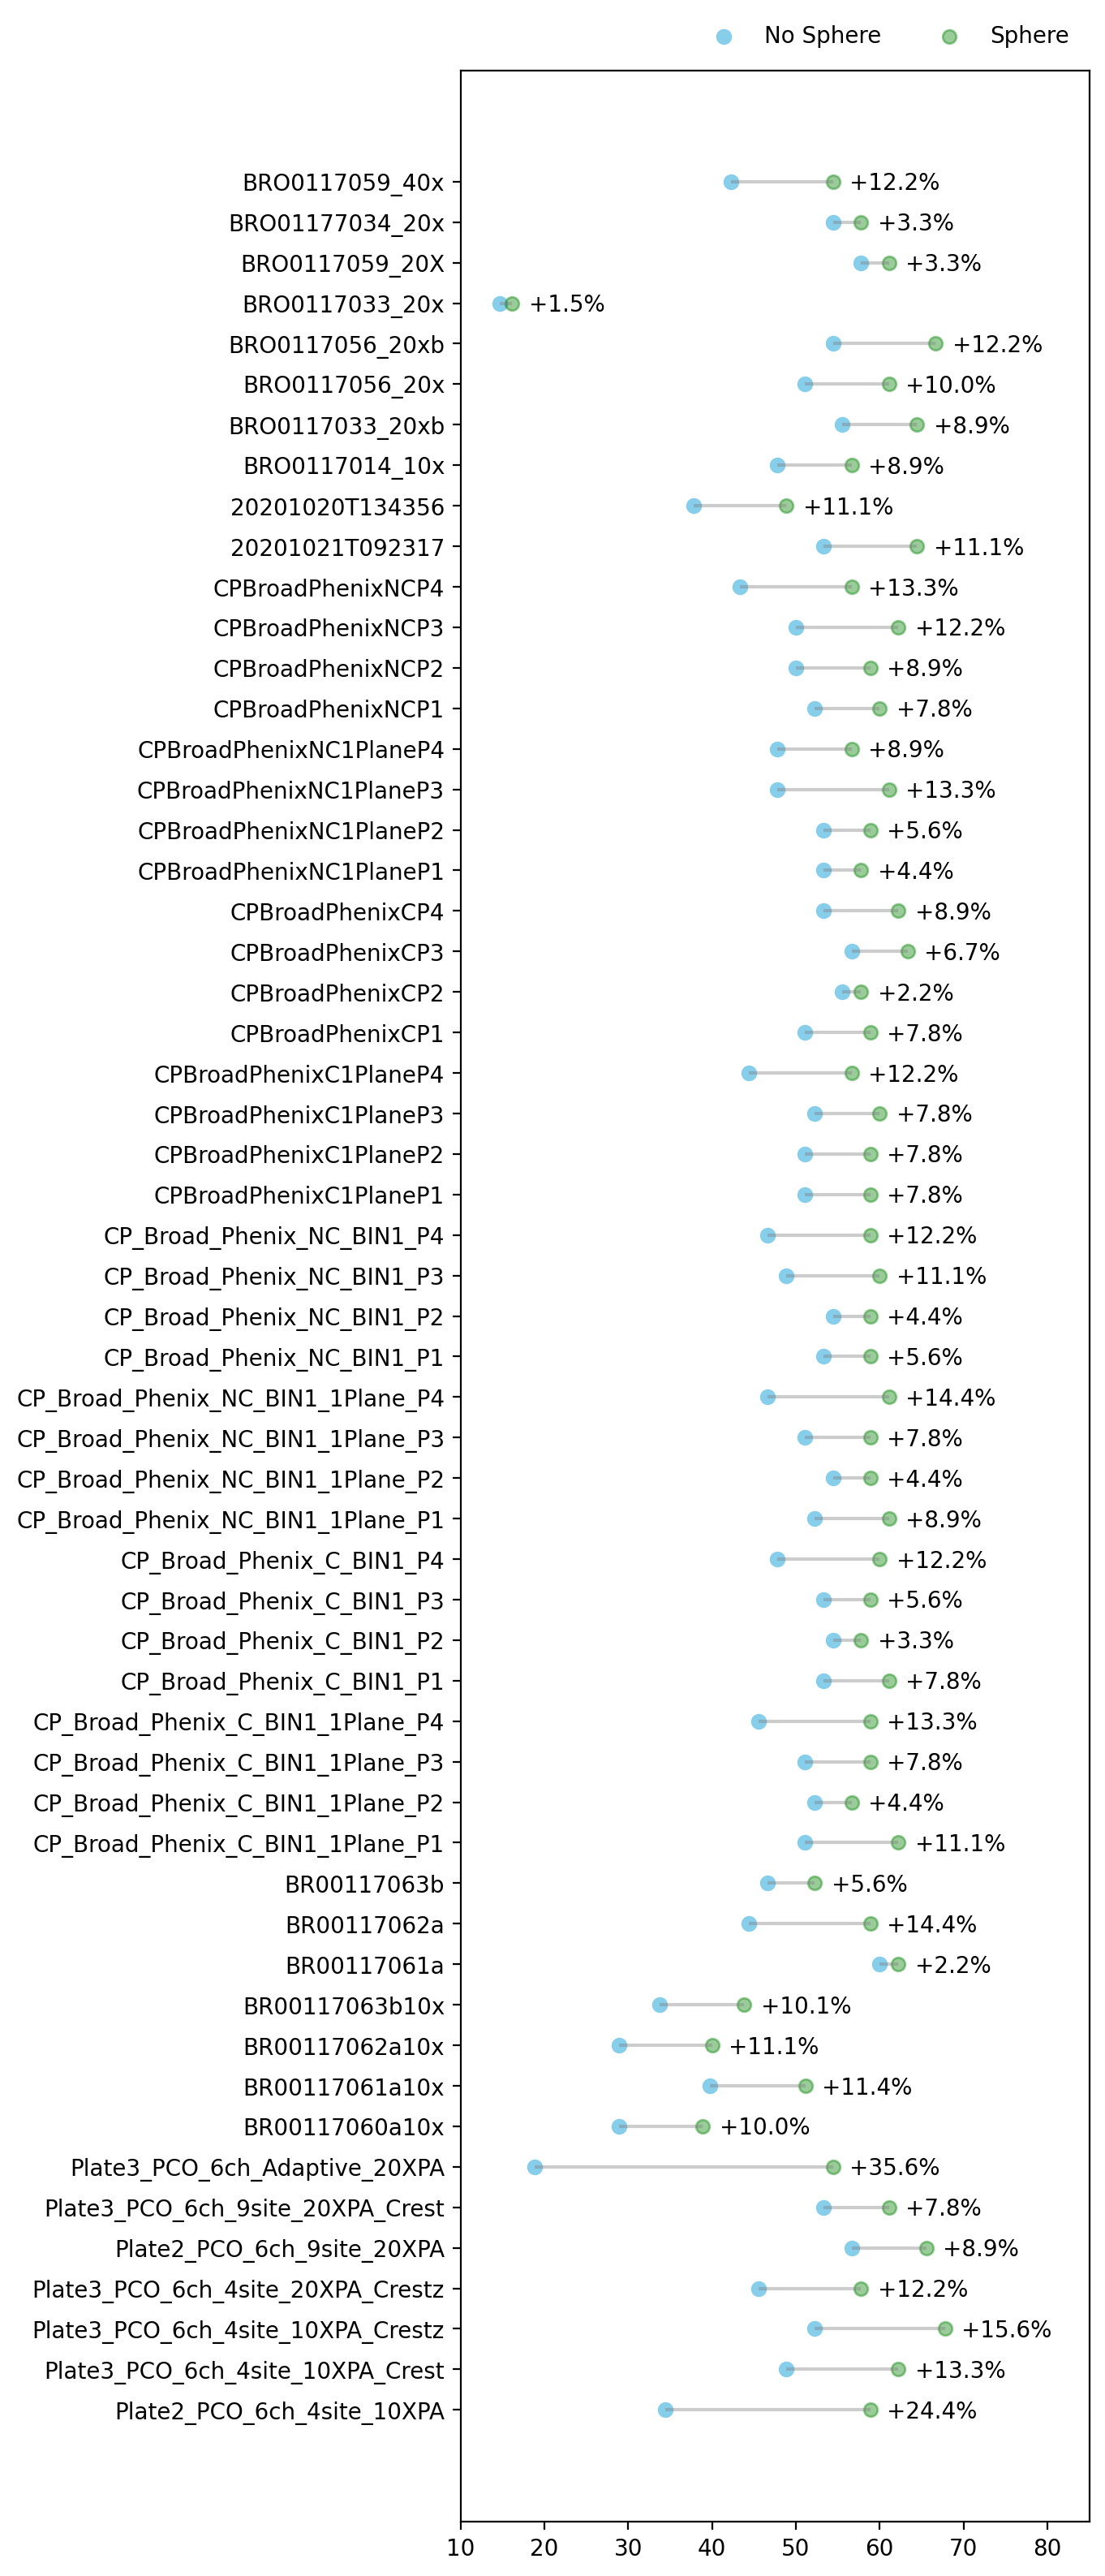

In [57]:
def dumbell_plot(df, save_fig=False):

        fig, ax = plt.subplots(figsize=(5, 20), dpi=200)

        df_len = df[df["sphering"]==True].shape[0]

        ax.set_xlim([10, 85])
        ax.hlines(df[df["sphering"]==True]["Assay_Plate_Barcode"], 
                xmin=df[df["sphering"]==False]["Percent_Replicating"].astype(float), 
                xmax=df[df["sphering"]==True]["Percent_Replicating"].astype(float),
                color='grey', alpha=0.4)
        ax.scatter(df[df["sphering"]==False]["Percent_Replicating"].astype(float),
                df[df["sphering"]==False]["Assay_Plate_Barcode"],
                color='skyblue', alpha=1,
                label="No Sphere")
        ax.scatter(df[df["sphering"]==True]["Percent_Replicating"].astype(float),
                df[df["sphering"]==True]["Assay_Plate_Barcode"],
                color='green', alpha=0.4,
                label="Sphere")
                # Sort=False to maintain order used in ax.hlines
        for (_, row), y in zip(df.groupby("Assay_Plate_Barcode", sort=False), range(0, df_len+1)):
                row.loc[row["sphering"]==True]["Percent_Replicating"].iloc[0]
                difference_value = row.loc[row['sphering']==True]['Percent_Replicating'].iloc[0] - row.loc[row['sphering']==False]['Percent_Replicating'].iloc[0]
                plt.annotate(f"+{difference_value:.1f}%", (row.loc[row["sphering"]==True]["Percent_Replicating"].iloc[0]+2, y -0.2))

        ax.legend(ncol=2, bbox_to_anchor=(1, 1.001), loc="lower right", frameon=False)
        fig.set_facecolor("white")

        if save_fig:
                fig.savefig("have_no_sphere.png", bbox_inches = 'tight')

dumbell_plot(df_replicating)

In [323]:
# Hide code output plots
%%capture 

# Recreate distribution plots
def distribution_plots(df, save_fig=False, outfile=None):

    n_experiments = df.shape[0]

    fig, ax_ = plt.subplots(n_experiments, 1, figsize=[12, n_experiments*8])
    for i, ax in zip(df.index, ax_.flatten()):
        ax.hist(df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
        ax.hist(df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
        ax.axvline(df.loc[i,'Value_95'], label='95% threshold')
        ax.legend(fontsize=20)
        ax.set_title(
            f"{df.loc[i,'Vendor']}\n" +
            f"Batch = {df.loc[i, 'Batch']}\n" +
            f"Plate = {df.loc[i, 'Assay_Plate_Barcode']}\n" +
            f"Percent Replicating = {df.loc[i,'Percent_Replicating']}",
            fontsize=25
        )
        ax.tick_params(axis='both', labelsize=20)
        ax.set_ylabel("Density", fontsize=25)
        ax.set_xlabel("Replicate correlation", fontsize=25)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
    plt.tight_layout()

    if save_fig:
        if outfile is not None:
            print(f"Saving figure to: {outfile}")
            fig.savefig(f"{outfile}", bbox_inches = 'tight')
        else:
            print("Saving figure to: distribution-plot.png")
            fig.savefig("distribution-plot.png", bbox_inches = "tight")
    return fig

distribution_plots(df_replicating.loc[df_replicating["sphering"]==True], save_fig=True, outfile="figures/distribution-with-sphering.png")
distribution_plots(df_replicating.loc[df_replicating["sphering"]==False], save_fig=True, outfile="figures/distribution-no-sphering.png")


In [325]:
# Trying to find method to find assay_plate_barcodes with os.walk

_, parent_folders, _ = next(os.walk("../jump-scope/profiles/"))

batchname_list = []
for i in parent_folders:
    _, subdirs, _ = next(os.walk(f"../jump-scope/profiles/{i}"))
    batchname_list.extend([os.path.join(f"../jump-scope/profiles/{i}/{sub}") for sub in subdirs])
# Why set? Well, it seems that there are profile duplicates within parent_folders
# I assume the original grouping was determined at this point, rather than through 
# reference to some central grouping DataFrame
# print(len(set(batchname_list)))

# print(batchname_list)

unique_batch_names = []
unique_batch_paths = []
for batch_path in batchname_list:
    batch_name = batch_path.split(os.path.sep)[-1]
    if batch_name not in unique_batch_names:
        unique_batch_names.append(batch_name)
        unique_batch_paths.append(batch_path)

print(len(unique_batch_paths))
# print(unique_batch_paths)

# batchname_list[0].split(os.path.sep)[-1]

56


# FoV and cell count analysis using the *siteSubSample* profiles

In [67]:
fov_experiment_df = (
    pd.read_csv('output/FoV-experiment-metadata.tsv', sep='\t')
#    .query('Batch==@batch')
)

fov_experiment_df

,Vendor,Batch,FoV_Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,Unnamed: 11,z_plane,BF_Zplanes,Anomaly
0,MolDev,Scope1_MolDev_10X,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,1,1,10,6,NaN,1,NaN,none
1,MolDev,Scope1_MolDev_10X,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,1,1,10,6,NaN,1,NaN,none
2,MolDev,Scope1_MolDev_10X_4siteZ,1siteSubSample_Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,1,1,10,6,NaN,1,NaN,none
3,MolDev,Scope1_MolDev_20X_4site,1siteSubSample_Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,1,1,20,6,NaN,1,NaN,none
4,MolDev,Scope1_MolDev_20X_9site,1siteSubSample_Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Confocal,9,1,1,20,6,NaN,1,NaN,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4,1,20,5,NaN,12,13,none
124,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4,1,20,5,NaN,12,15,none
125,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4,1,20,6,NaN,12,15,none
126,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4,1,20,6,NaN,12,15,none


In [68]:
# Add perc rep/match to FoV

fov_df_replicating = create_moa_dataframe(pd.read_csv('output/FoV-experiment-metadata.tsv', sep='\t'), 
                                                    "../jump-scope/profiles/",
                                                    batch_col="FoV_Batch",
                                                     match_or_rep_or_both="replicating", 
                                                     enable_sphering="no")

# fov_df_matching = create_moa_dataframe(pd.read_csv('output/FoV-experiment-metadata.tsv', sep='\t'), 
#                                                     "../jump-scope/profiles/",
#                                                     batch_col="FoV_Batch",
#                                                      match_or_rep_or_both="matching", 
#                                                      enable_sphering="no")

# fov_df_replicating = create_moa_dataframe(pd.read_csv('output/FoV-experiment-metadata.tsv', sep='\t'), 
#                                                     "../jump-scope/profiles/",
#                                                     batch_col="FoV_Batch",
#                                                      match_or_rep_or_both="replicating", 
#                                                      enable_sphering="yes")

def add_total_cell_counts(df, profile_path):
    out_df = df.copy()
    for i in df.index:
        batch = df.loc[i, "FoV_Batch"]
        barcode = df.loc[i, "Assay_Plate_Barcode"]
        load_path = os.path.join(profile_path, batch, barcode, f"{barcode}_normalized_negcon.csv.gz")
        load_df = pd.read_csv(load_path)
        sum_cells = sum(load_df.loc[:,"Metadata_Count_Cells"])
        out_df.loc[i, "Cell_Count"] = sum_cells
    return out_df

fov_df_replicating = add_total_cell_counts(fov_df_replicating, "../jump-scope/profiles/")

fov_df_replicating
# fov_df_matching


/Users/ctromans/miniconda3/envs/jump-scope/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/ctromans/miniconda3/envs/jump-scope/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/ctromans/miniconda3/envs/jump-scope/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/ctromans/miniconda3/envs/jump-scope/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


,Vendor,Batch,FoV_Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,...,Unnamed: 11,z_plane,BF_Zplanes,Anomaly,Replicating,Null_Replicating,Percent_Replicating,Value_95,sphering,Cell_Count
0,MolDev,Scope1_MolDev_10X,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,1,1,10,...,NaN,1,NaN,none,"[-0.0035480679468849917, -0.02713708204376649,...","[0.022376548993896565, 0.00013365390207073643,...",17.777778,0.402206,False,511430.0
1,MolDev,Scope1_MolDev_10X,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,1,1,10,...,NaN,1,NaN,none,"[0.02610832466873135, 0.039859624120984205, 0....","[0.15532973213491028, 0.019266929234316953, 0....",23.333333,0.488058,False,617546.0
2,MolDev,Scope1_MolDev_10X_4siteZ,1siteSubSample_Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,1,1,10,...,NaN,1,NaN,none,"[-0.013443456762634672, -0.015926390000716273,...","[0.25989550211598567, 0.5990168219673834, -0.0...",20.000000,0.671042,False,608864.0
3,MolDev,Scope1_MolDev_20X_4site,1siteSubSample_Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,1,1,20,...,NaN,1,NaN,none,"[-0.06992517003129306, -0.05415402501605597, 0...","[0.23414090102456286, 0.01269786862617996, 0.0...",34.444444,0.324245,False,132155.0
4,MolDev,Scope1_MolDev_20X_9site,1siteSubSample_Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Confocal,9,1,1,20,...,NaN,1,NaN,none,"[0.09293820147883512, -0.027940625654125105, -...","[0.31816509884043176, 0.04113458183217434, 0.0...",24.444444,0.423722,False,137083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4,1,20,...,NaN,12,13,none,"[0.11787495125566441, 0.16802342032189477, 0.2...","[0.34407109311225326, 0.06787589266602236, -0....",41.111111,0.342519,False,544244.0
124,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4,1,20,...,NaN,12,15,none,"[0.16959184770712224, 0.22233273446776852, 0.0...","[-0.018133237398572755, -0.04198256296740488, ...",45.555556,0.323481,False,543826.0
125,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4,1,20,...,NaN,12,15,none,"[0.38973771531652707, 0.01460006207482378, 0.1...","[0.04613611678468739, 0.4294860412641134, 0.06...",20.000000,0.619119,False,489099.0
126,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4,1,20,...,NaN,12,15,none,"[-0.04580911089947984, -0.041760079848138204, ...","[0.12186088341580506, 0.4264830109293543, 0.22...",21.111111,0.668587,False,452567.0


In [18]:
# FoV Checkpoint save

if not os.path.isdir("checkpoints"):
    os.mkdir("checkpoints")

fov_df_replicating.to_csv("checkpoints/fov-moa-replicating-sphering.csv", index_label='index', index=False)
# df_matching.to_csv("checkpoints/fov-moa-matching-sphering.csv", index_label='index', index=False)

In [ ]:
# Load FoV Checkpoint

fov_df_replicating = pd.read_csv("checkpoints/fov-moa-replicating-sphering.csv", converters={'Null_Replicating':utilssphering.safe_literal_eval, "Replicating":utilssphering.safe_literal_eval})
# fov_df_matching = pd.read_csv("checkpoints/fov-moa-matching-sphering.csv", converters={'Null_Matching':utilssphering.safe_literal_eval, "Matching":utilssphering.safe_literal_eval})

In [ ]:
def fov_cell_count_plots(df, save_fig=False, outfile=None):
    n_experiments = len(df)
    fig, ax_ = plt.subplots(n_experiments, 1, figsize=[12, n_experiments*8], facecolor="white")

    for ((_, rows), ax) in zip(df, ax_.flatten()):
        x = rows.loc[:,"Cell_Count"]
        y = rows.loc[:,"Percent_Replicating"]
        ax.scatter(x, y)
        ax.plot(x, y)
        for i, txt in enumerate(range(0, len(x))):
            ax.annotate(rows.loc[:,"Sites-SubSampled"].values[i], 
            (x.values[i], y.values[i]),
            fontsize=25,
            horizontalalignment='center',
            verticalalignment='bottom'
            )

        ax.set_title(
            f"{rows.loc[:,'Vendor'].unique()}\n" +
            f"Batch = {rows.loc[:, 'FoV_Batch'].unique()}\n" +
            f"Plate = {rows.loc[:, 'Assay_Plate_Barcode'].unique()}\n",
            fontsize=25
        )
        ax.tick_params(axis='both', labelsize=20)
        ax.set_ylabel("Percent Replicating", fontsize=25)
        ax.set_xlabel("Number of Cells", fontsize=25)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
    plt.tight_layout()

    if save_fig:
        if outfile is not None:
            print(f"Saving figure to: {outfile}")
            fig.savefig(f"{outfile}", bbox_inches = 'tight')
        else:
            print("Saving figure to: fov_count_plot.png")
            fig.savefig("fov_count_plot.png", bbox_inches = "tight")
    return fig

fov_cell_count_plots(fov_df_replicating.groupby(["Batch", "Assay_Plate_Barcode"]), save_fig=True, outfile="figures/fov_cell_count.png")


# Dropout plots

In [14]:

def return_prop95(dataframe, match_or_rep="replicating", enable_sphering=False):
    """
    dataframe: pandas.DataFrame to find the prop95 for 
    """
    n_samples = 1000
    n_replicates = 4  #number of sample replicates within each plate 
    metadata_common = 'Metadata_moa'
    # metadata_perturbation = 'Metadata_broad_sample'
    # group_by_feature = 'Metadata_broad_sample'
    metadata_perturbation = 'Metadata_pert_iname'
    group_by_feature = 'Metadata_pert_iname'
    if match_or_rep.casefold() == "replicating":
        if enable_sphering:
            _, _, prop_95_replicating_sphere, _ = utilssphering.calculate_percent_replicating_MOA("", "", data_df=dataframe)
            return prop_95_replicating_sphere

        if not enable_sphering: 
            plate_df = utils.remove_negcon_empty_wells(dataframe)
            replicate_corr = list(utils.corr_between_replicates(plate_df, group_by_feature))
            null_replicating = list(utils.corr_between_non_replicates(plate_df, n_samples=n_samples, n_replicates=n_replicates, metadata_compound_name=group_by_feature))
            prop_95_replicating, _ = utils.percent_score(null_replicating, replicate_corr, how='right')
            return prop_95_replicating

    if match_or_rep.casefold() == "matching":
        if enable_sphering:
            _, _, prop_95_matching_sphere, _ = utilssphering.calculate_percent_matching_MOA("", "", data_df=dataframe)
            return prop_95_matching_sphere

        if not enable_sphering:
            plate_df = utils.remove_negcon_empty_wells(dataframe)
            matching_corr = list(utils.corr_between_perturbation_pairs(plate_df, 'Metadata_moa', 'Metadata_broad_sample'))
            null_matching = list(utils.corr_between_perturbation_non_pairs(plate_df, n_samples=n_samples, metadata_common=metadata_common, metadata_perturbation=metadata_perturbation))
            prop_95_matching, _ = utils.percent_score(null_matching, matching_corr, how='right')
            return prop_95_matching


In [50]:
### Creating dropout datasets + matrix
def do_feature_select(plate_df):
    """
    Find the column names that are CellProfiler features. Eg. column names
    that start with "Nuclei" or "Cytoplasm"
    """
    feature_select_features = pycytominer.cyto_utils.infer_cp_features(
        plate_df
    )
    # For all of the cellprofiler features, perform these operations on them
    return pycytominer.feature_select(
        profiles=plate_df,
        features=feature_select_features,
        operation=['variance_threshold','correlation_threshold',
        'drop_na_columns','blocklist']
    )

def all_combo_dropouts_in_a_category(category_list,outfile,subsample=None):
    """
    Create a database with dropped out features

    category_list: the categories to drop out (for example, Nuclei, Cytoplasm, Cells)
    outfile: save csv path
    """
    # For all of the categories, find all possible combinations with itertools.combinations
    to_try = [y for x in range(len(category_list)+1) for y in list(set(itertools.combinations(category_list,x)))]

    # If the output csv already exists, check what dropouts have already been tried
    # Don't try them again
    if os.path.exists(outfile):
        dropout_df = pd.read_csv(outfile)
        tried=list(dropout_df['Dropout'])
        print(f"Already try {tried},skipping")
        to_try = [x for x in to_try if str(x) not in tried]
    # Otherwise, dropout columns will be generated from scratch
    else:
        dropout_df = pd.DataFrame()
    
    # For the given categories, go through each combination (eg. ('Cells', 'Cytoplasm'), ('Nuclei', 'Cytoplasm') etc.)
    for eachdropout in to_try:
        # Get what columns are expected. I don't like this method
        normalized_master = pd.read_csv('../profiles-pilots/profiles/Stain5_CondC_Standard/BR00120274/BR00120274_normalized_negcon.csv.gz')
        col_list = normalized_master.columns
        if subsample:
             for each_item in subsample:
                metadata_list = [x for x in col_list if 'Metadata' in x] 
                col_list = metadata_list+[x for x in col_list if each_item in x]
        for each_item in eachdropout:
            # Create a list of columns that DOESN'T contain the categories being iterated
            # Thus this will iterate over all categories (eg. nuclei, cell, cytoplasm) and
            # drop all of the column names
            col_list = [x for x in col_list if each_item not in x]
        dropout_dict = {}
        temp_dropout_dict = {}
        # Code unique to this dataset. Iterate through plates
        for eachplate in range(70,78):
            try:
                # Read only the columns previously defined for each plate being iterated over
                # Again, don't like this hardcoding. Should be some sort of os.walk situation
                normalized = pandas.read_csv(
                    f'../profiles-pilots/profiles/Stain5_CondC_Standard/BR001202{eachplate}/BR001202{eachplate}_normalized_negcon.csv.gz',
                    usecols=col_list)
                # For the loaded dataset, calculate feature selection AFTER column dropout
                feature_select = do_feature_select(normalized)
                temp_dropout_dict[f'{eachplate}_featnum']=len(feature_select.columns)
                # Now, calculate the perc_rep for the dropout dataset 
                ### NOTE: in utilsphering, calculate_percent_replicating_MOA has been updated to return
                ### replicate_corr, null_corr, prop_95, value_95_replicating
                ### In this example, calculate_percent_replicating_MOA is **only returning prop_95**
                dropout_dict[f'BR001202{eachplate}']= calculate_percent_replicating_MOA('','',data_df=feature_select)
            except:
                dropout_dict[f'BR001202{eachplate}']=0
        # Convert the calculated perc_rep into np.array for each dropout 
        results_array = np.array(list(dropout_dict.values()))
        for k,v in temp_dropout_dict.items():
            dropout_dict[k]=v
        # For the dropout dataset created, calculate the mean perc_replicating for ALL of the plates
        # Why all of the plates? Are these replicates?
        # Means are calculated within each dropout group
        dropout_dict['Mean']=results_array.mean()
        dropout_dict['Median']=np.median(results_array)
        dropout_dict['Standard deviation']=np.std(results_array)
        dropout_dict['Dropout']=eachdropout
        dropout_dict['Remaining'] = [x for x in category_list if x not in eachdropout]
        dropout_dict['n_columns']=len(col_list)
        dropout_df = dropout_df.append(dropout_dict,ignore_index=True)
        print(eachdropout,dropout_dict['Mean'])
        dropout_df.to_csv(outfile,index=False)
    print(dropout_df['Mean'].describe())
    print(dropout_df['Median'].describe())

def category_dropout(
    dataframe, 
    plate_barcode, 
    category_list, 
    match_or_rep_or_both="replicating",
    enable_sphering="both", 
    outfile=None
):
    input_columns = dataframe.columns
    possible_combinations = [y for x in range(len(category_list)+1) for y in list(set(itertools.combinations(category_list,x)))]
    rep_df_list = list()
    match_df_list = list()
    # Iterate through the combination to dropout
    for dropout_group in possible_combinations: 
        col_list = input_columns
        # Within the droupout group, find the column to actually drop
        for each_item in dropout_group:
            # Only keep columns that don't contain the dropout
            col_list = [x for x in input_columns if each_item not in x]
        remaining_group = [x for x in category_list if x not in dropout_group]
        print(f"---- Dropping: {dropout_group}. Remaining: {remaining_group} ----")
        dropped_dataframe = dataframe[col_list]
        feature_select = do_feature_select(dropped_dataframe)
        # return feature_select
        if match_or_rep_or_both.casefold() == "replicating" or match_or_rep_or_both.casefold() == "both":
            if enable_sphering.casefold() == "yes" or enable_sphering.casefold() == "both":
                prop_95 = return_prop95(feature_select, match_or_rep="replicating", enable_sphering=True)
                _df = pd.DataFrame({
                    "assay_plate_barcode": plate_barcode,
                    "num_features": len(feature_select.columns),
                    "dropout": str(dropout_group),
                    "remaining": str(remaining_group),
                    "n_columns": len(col_list),
                    "sphering": True,
                    "percent_replicating": [prop_95]
                })
                rep_df_list.append(_df)
            if enable_sphering.casefold() == "no" or enable_sphering.casefold() == "both":
                prop_95 = return_prop95(feature_select, match_or_rep="replicating", enable_sphering=False)
                _df = pd.DataFrame({
                    "assay_plate_barcode": plate_barcode,
                    "num_features": len(feature_select.columns),
                    "dropout": str(dropout_group),
                    "remaining": str(remaining_group),
                    "n_columns": len(col_list),
                    "sphering": False,
                    "percent_replicating": [prop_95]
                })
                rep_df_list.append(_df)
        if match_or_rep_or_both.casefold() == "matching" or match_or_rep_or_both.casefold() == "both":
            if enable_sphering.casefold() == "yes" or enable_sphering.casefold() == "both":
                prop_95 = return_prop95(feature_select, match_or_rep="matching", enable_sphering=True)
                _df = pd.DataFrame({
                    "assay_plate_barcode": plate_barcode,
                    "num_features": len(feature_select.columns),
                    "percent_matching": [prop_95],
                    "dropout": str(dropout_group),
                    "remaining": str(remaining_group),
                    "n_columns": len(col_list),
                    "sphering": True,
                    "percent_matching": [prop_95]
                })
                match_df_list.append(_df)
            if enable_sphering.casefold() == "no" or enable_sphering.casefold() == "both":
                prop_95 = return_prop95(feature_select, match_or_rep="matching", enable_sphering=False)
                _df = pd.DataFrame({
                    "assay_plate_barcode": plate_barcode,
                    "num_features": len(feature_select.columns),
                    "percent_matching": [prop_95],
                    "dropout": str(dropout_group),
                    "remaining": str(remaining_group),
                    "n_columns": len(col_list),
                    "sphering": False,
                    "percent_matching": [prop_95],
                })
                match_df_list.append(_df)
    # Concatenate the data
    if match_or_rep_or_both.casefold() == "replicating" or match_or_rep_or_both.casefold() == "both":
        rep_df = pd.concat(rep_df_list, ignore_index=True)
    if match_or_rep_or_both.casefold() == "matching" or match_or_rep_or_both.casefold() == "both":
        match_df = pd.concat(match_df_list, ignore_index=True)
    
    if outfile is not None:
        dropout_df.to_csv(outfile,index=False)
                
    # Merge so perc rep and match is in the same place
    if match_or_rep_or_both.casefold() == "both":
        return rep_df.merge(match_df, how="inner")
    if match_or_rep_or_both.casefold() == "replicating":
        return rep_df
    elif match_or_rep_or_both.casefold() == "matching":
        return match_df

    # if outfile is not None:
    #     dropout_df.to_csv(outfile,index=False)
    # return dropout_df

# TODO: Check that this is accurately dropping, integrate with os.walk, integrate with heatmap matrix
# No need to integrate with os.walk. Use metadata csv



load_file = "../jump-scope/profiles/1siteSubSample_Scope1_MolDev_10X/Plate2_PCO_6ch_4site_10XPA/Plate2_PCO_6ch_4site_10XPA_normalized_negcon.csv.gz"

test_data = pd.read_csv(load_file)

category_dropout(test_data, "Plate2_PCO_6ch_4site_10XPA", ["Nuclei"], "both", "both", "test.csv")

# ['Nuclei','Cells','Cytoplasm']


---- Dropping: (). Remaining: ['Nuclei'] ----
---- Dropping: ('Nuclei',). Remaining: [] ----


,assay_plate_barcode,num_features,dropout,remaining,n_columns,sphering,percent_replicating,percent_matching
0,Plate2_PCO_6ch_4site_10XPA,459,(),['Nuclei'],4357,True,45.555556,11.627907
1,Plate2_PCO_6ch_4site_10XPA,459,(),['Nuclei'],4357,False,13.333333,4.651163
2,Plate2_PCO_6ch_4site_10XPA,337,"('Nuclei',)",[],2909,True,42.222222,11.627907
3,Plate2_PCO_6ch_4site_10XPA,337,"('Nuclei',)",[],2909,False,11.111111,6.976744
